In [1]:
import glob
import xarray as xr
import pyaerocom as pya
from iris import load_cube

import iris
import os

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
from pyaerocom import Region, Filter

# What you can do ising the region object currently.

## Raises not implemented error if you try to get closest region and send a htap region as input. Maybee we should have a mapping between square to htap here..?

In [3]:
r = Region('EUR')

# Need this for masks as well? suggestion. pya.region.masks()

In [4]:
pya.region.all()

['EUROPE',
 'WORLD',
 'ASIA',
 'AUSTRALIA',
 'CHINA',
 'INDIA',
 'NAFRICA',
 'SAFRICA',
 'SAMERICA',
 'NAMERICA',
 'PAN',
 'EAS',
 'NAF',
 'MDE',
 'LAND',
 'SAS',
 'SPO',
 'OCN',
 'SEA',
 'RBU',
 'EEUROPE',
 'NAM',
 'WEUROPE',
 'SAF',
 'USA',
 'SAM',
 'EUR',
 'NPO',
 'MCA']

## MASK -  "EUROPE-NoMountains-LAND/OCN"

In [5]:
def available_region_mask():
    """
    Currently in land sea mask helpers. MOVE?

    
    Returns
    ----------
    arr : List[str]
        Returns a list of available htap region masks.
    """
    from pyaerocom import const
    return const.HTAP_REGIONS

In [6]:
available_region_mask()

['PAN',
 'EAS',
 'NAF',
 'MDE',
 'LAND',
 'SAS',
 'SPO',
 'OCN',
 'SEA',
 'RBU',
 'EEUROPE',
 'NAM',
 'WEUROPE',
 'SAF',
 'USA',
 'SAM',
 'EUR',
 'NPO',
 'MCA']

In [7]:
f = Filter("EUROPE-noMOUNTAINS-LAND")

Directory exit but doesn't contain any masks.


In [8]:
f._name

'EUROPE-noMOUNTAINS-LAND'

In [9]:
r.is_htap

True

In [10]:
# Plotting routine only works for htap regions.

# color white and grey remove colorbar. 
Labels Latidute Longited search for geoaxes 

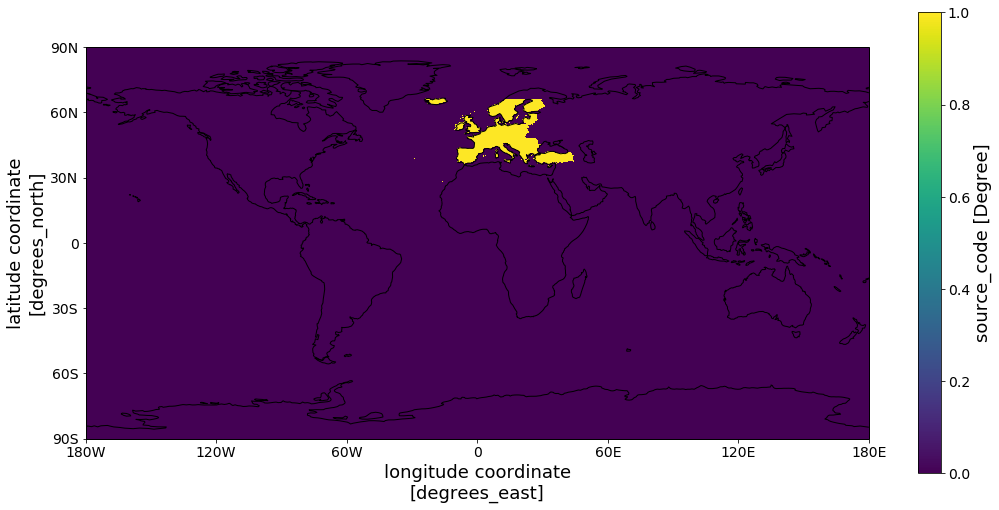

In [11]:
r.plot()

# Example Ungridded, Gridded and Colocated.

In [12]:
import pyaerocom as pya

Notes_

* move away from updating the mask. 



In [13]:
import pyaerocom as pya

In [14]:
pya.browse_database('*MODIS6*aqua*')

No files of type .nc could be found in current data_dir=/lustre/storeA/project/aerocom/aerocom-users-database/SATELLITE-DATA/MODIS6.1aqua.day.only
No files of type .nc could be found in current data_dir=/lustre/storeA/project/aerocom/aerocom-users-database/SATELLITE-DATA/MODIS6.1aqua.day.only



Pyaerocom ReadGridded
---------------------
Data ID: MODIS6.1aqua
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/SATELLITE-DATA/MODIS6.1aqua/renamed
Available experiments: ['MODIS6.1aqua']
Available years: [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
Available frequencies ['daily']
Available variables: ['od550aer']
Reading failed for MODIS6.1aqua.day.only. Error: AttributeError("'NoneType' object has no attribute 'experiment'")

Pyaerocom ReadGridded
---------------------
Data ID: MODIS6.aqua
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/SATELLITE-DATA/MODIS6.aqua/renamed
Available experiments: ['MODIS6.aqua']
Available years: [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
Available frequencies ['daily']
Available variables: ['od550aer']


Deactivating file search by vertical code for MODIS6.1aqua, since filenames do not include information about vertical code (probably AeroCom 2 convention)
/home/hannas/anaconda3/envs/TEST/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'od550aer' invalid units 'none'
  warnings.warn(msg)
Overwriting unit unknown in cube od550aer with value "1"
/home/hannas/anaconda3/envs/TEST/lib/python3.7/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/hannas/anaconda3/envs/TEST/lib/python3.7/site-packages/iris/coords.py:1138: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
/home/hannas/anaconda3/envs/TEST/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.wa

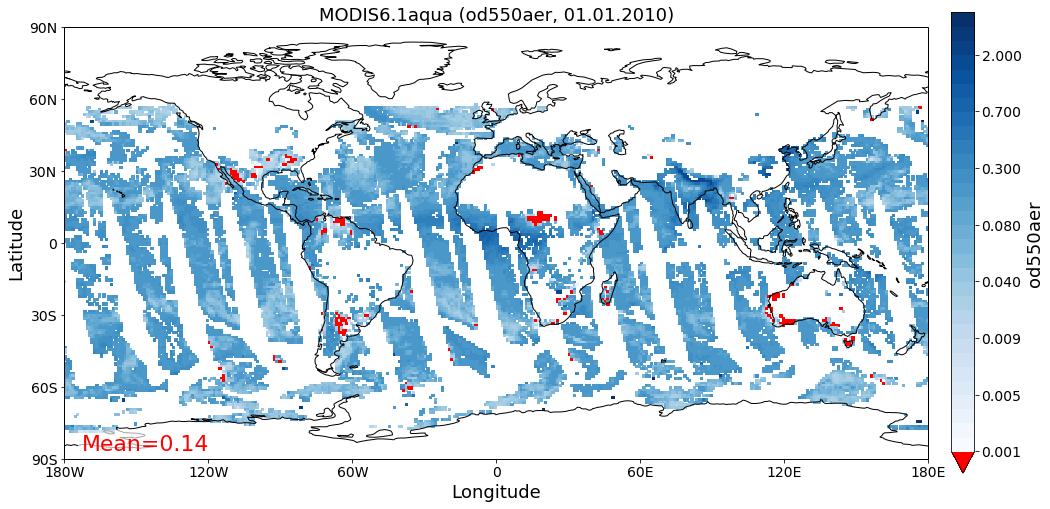

In [15]:
reader = pya.io.ReadGridded(data_id="MODIS6.1aqua")
sat = reader.read_var('od550aer', ts_type='monthly', start = 2010)
sat.quickplot_map();

Applying regional cropping in GriddedData using Filter class. Note that this does not yet include potential cropping in the vertical dimension. Coming soon...


Masks are available in MyPyaerocom


/home/hannas/Desktop/pyaerocom/pyaerocom/plot/mapping.py:327: RuntimeWarning: invalid value encountered in greater
  vmin = data[data>0].min()
/home/hannas/anaconda3/envs/TEST/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
Failed to compute / add area weighted mean. Reason: ValueError('Format specifier missing precision')


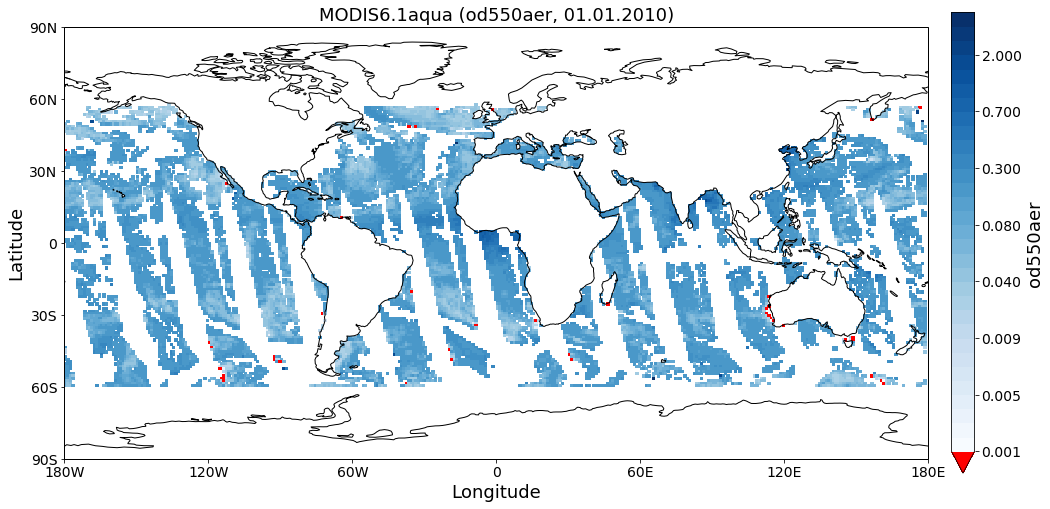

In [16]:
f = Filter(name = 'WORLD-noMOUNTAINS-OCN')
# data can either coloc, gridded, ungridded
data = f.apply(sat)
data.quickplot_map();

Applying regional cropping in GriddedData using Filter class. Note that this does not yet include potential cropping in the vertical dimension. Coming soon...


Masks are available in MyPyaerocom


/home/hannas/Desktop/pyaerocom/pyaerocom/plot/mapping.py:327: RuntimeWarning: invalid value encountered in greater
  vmin = data[data>0].min()
/home/hannas/anaconda3/envs/TEST/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
Failed to compute / add area weighted mean. Reason: ValueError('Format specifier missing precision')


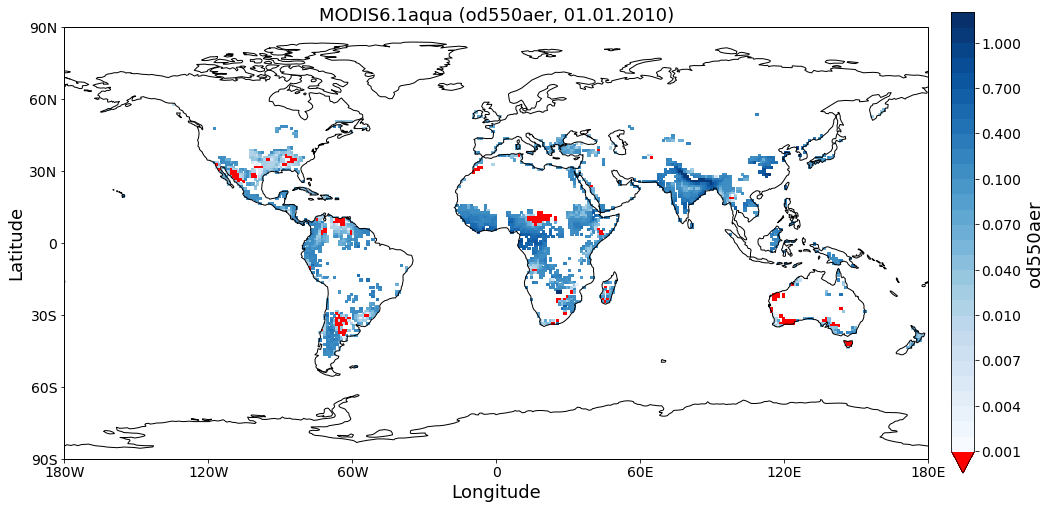

In [17]:
f = Filter(name = 'WORLD-noMOUNTAINS-LAND')
data = f.apply(sat)
data.quickplot_map();

## You mentioned to compare Modis aqua 6.1 against one of the ctrl 2019, 2010 runs. 

- Variable: od550aer (AOD at 550nm)
- 2 models: TM5 and NorESM2, colocate vs.
- 2 satellites: MODIS 6.1 aqua (daily), AATSRv4.3 SU (only monthly available)
- Colocate using only sea, only land and together and try to establish differences (e.g. bias (NMB)), particularly AATSR vs. MODIS in south pacific
- For colocation, be aware of input args `colocate_time, apply_time_resampling_constraints, min_num_obs=2?`
- for gridded vs gridded use `regrid_res_deg=5` to start with

In [18]:
pya.browse_database('*aeronet*sun*')

Reading failed for AeronetSunV2Lev1.5.daily. Error: NetworkNotImplemented('No reading class available yet for dataset AeronetSunV2Lev1.5.daily')
Reading failed for AeronetSun_2.0_NRT. Error: NetworkNotImplemented('No reading class available yet for dataset AeronetSun_2.0_NRT')

Dataset name: AeronetSunV2Lev2.daily
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetRaw2.0/renamed
Supported variables: ['od1640aer', 'od1020aer', 'od870aer', 'od675aer', 'od667aer', 'od555aer', 'od551aer', 'od532aer', 'od531aer', 'od500aer', 'od440aer', 'od380aer', 'od340aer', 'ang4487aer', 'od550aer', 'ang4487aer_calc']
Last revision: 20180519

Dataset name: AeronetSunV2Lev2.AP
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetSun2.0AllPoints/renamed
Supported variables: ['od1640aer', 'od1020aer', 'od870aer', 'od675aer', 'od667aer', 'od555aer', 'od551aer', 'od532aer', 'od531aer', 'od500aer', 'od440aer', 'od380aer', 'od340aer', 'ang4487aer', 'od550aer

# Test ungridded 

In [19]:
obs_id = 'AeronetSunV2Lev2.daily'

In [20]:
obs_reader = pya.io.ReadUngridded(obs_id, 'od500aer')
obs_data = obs_reader.read()#.filter_by_meta(altitude=[0, 1000])
print(obs_data)


Pyaerocom UngriddedData
-----------------------
Contains networks: ['AeronetSunV2Lev2.daily']
Contains variables: ['od500aer']
Contains instruments: ['sun_photometer']
Total no. of meta-blocks: 1028


Masks are available in MyPyaerocom


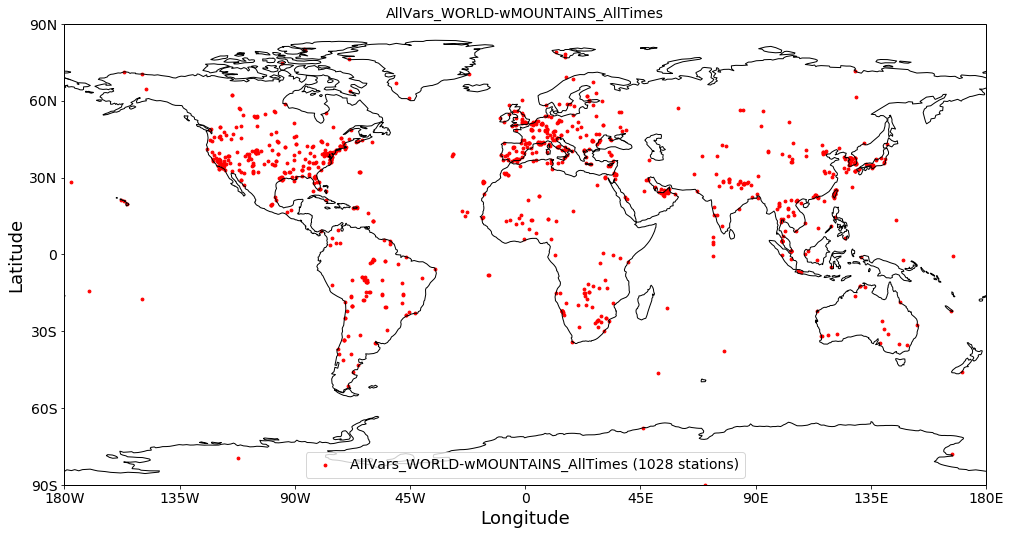

In [21]:
obs_data.plot_station_coordinates()

In [22]:
f = Filter(name = 'EUROPE-noMOUNTAINS')
data = f.apply(obs_data) 

Masks are available in MyPyaerocom


/home/hannas/Desktop/pyaerocom/pyaerocom/ungriddeddata.py:126: RuntimeWarning: invalid value encountered in multiply
  self._data = np.empty([num_points, self._COLNO]) * np.nan


Masks are available in MyPyaerocom


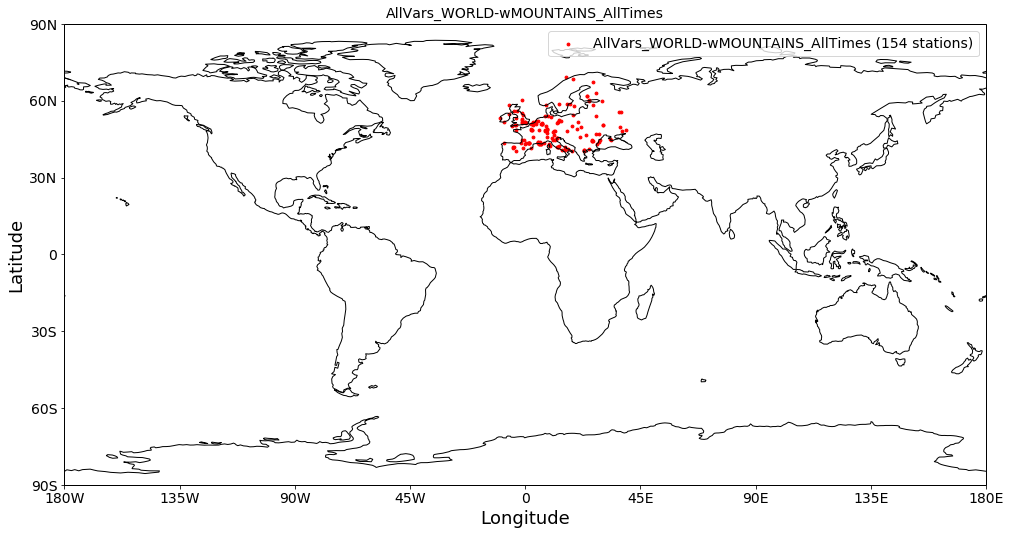

In [23]:
data.plot_station_coordinates()

Masks are available in MyPyaerocom
Masks are available in MyPyaerocom


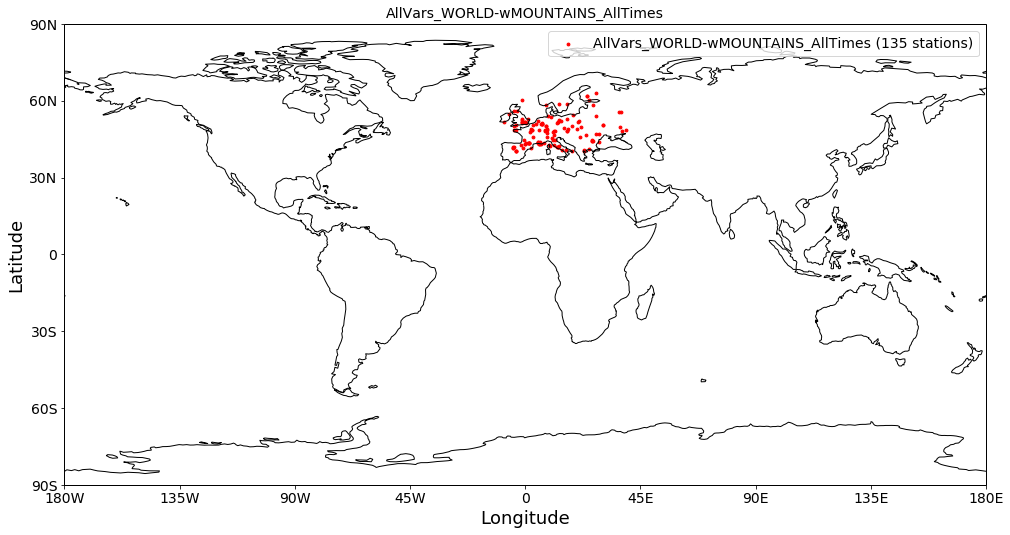

In [24]:
f = Filter(name = 'EUROPE-noMOUNTAINS-LAND')
ungridded_data = pya.io.ReadUngridded().read('AeronetSunV3Lev2.daily' , 'od550aer')
ungridded_data = f.apply(ungridded_data)
ungridded_data.plot_station_coordinates()

Masks are available in MyPyaerocom
Masks are available in MyPyaerocom


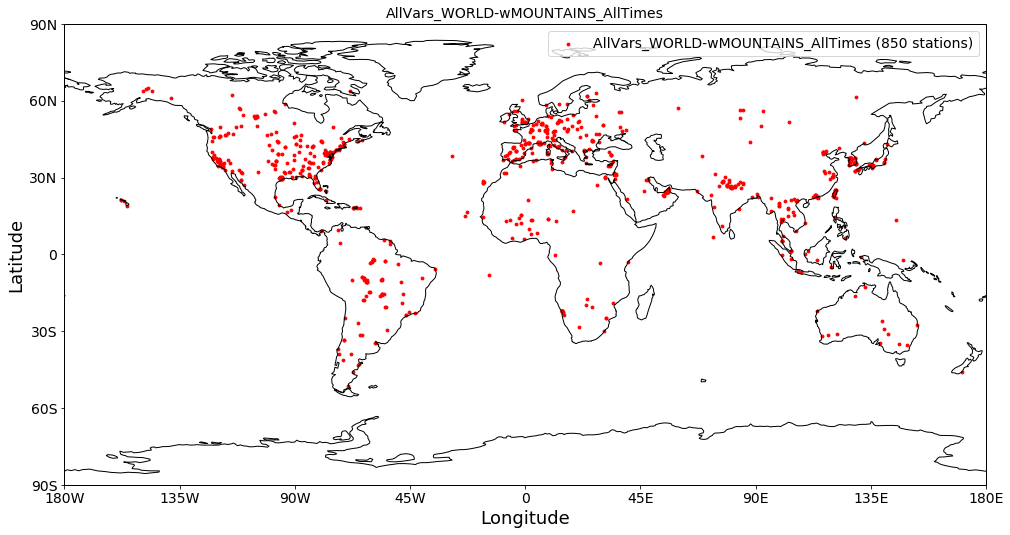

In [25]:
f = Filter(name = 'WORLD-noMOUNTAINS-LAND')
ungridded_data = pya.io.ReadUngridded().read('AeronetSunV3Lev2.daily' , 'od550aer')

ungridded_data = f.apply(ungridded_data)
ungridded_data.plot_station_coordinates()

Masks are available in MyPyaerocom
Masks are available in MyPyaerocom


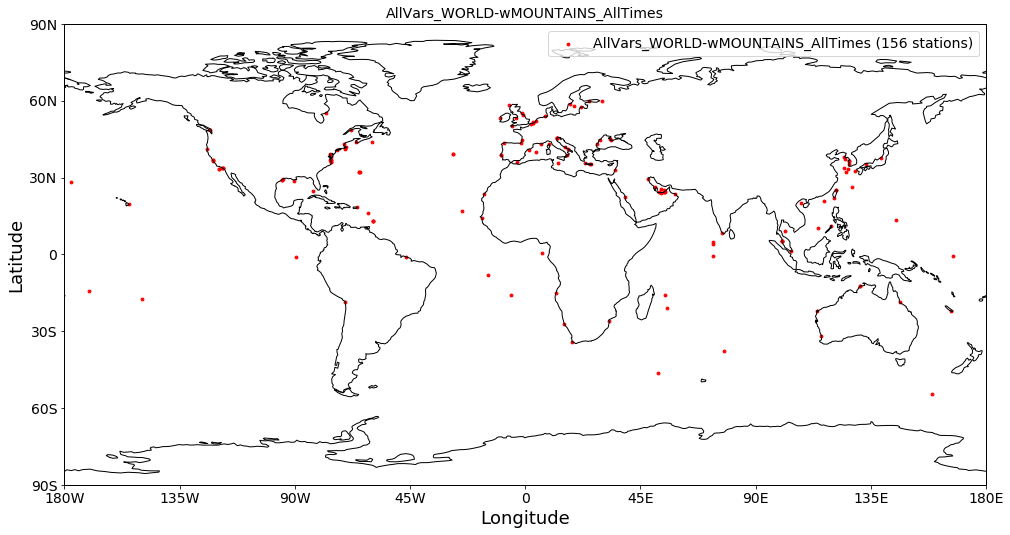

In [26]:
f = Filter(name = 'WORLD-noMOUNTAINS-OCN')
ungridded_data = pya.io.ReadUngridded().read('AeronetSunV3Lev2.daily' , 'od550aer')

ungridded_data = f.apply(ungridded_data)
ungridded_data.plot_station_coordinates()

## Colocate the two above? 

In [27]:
model_id = 'EC-Earth3-AerChem-met2010_AP3-CTRL2019'

In [28]:
reader = pya.io.ReadGridded(data_id=model_id)
model = reader.read_var('od550aer', ts_type='daily', start = 2010)

/home/hannas/anaconda3/envs/TEST/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


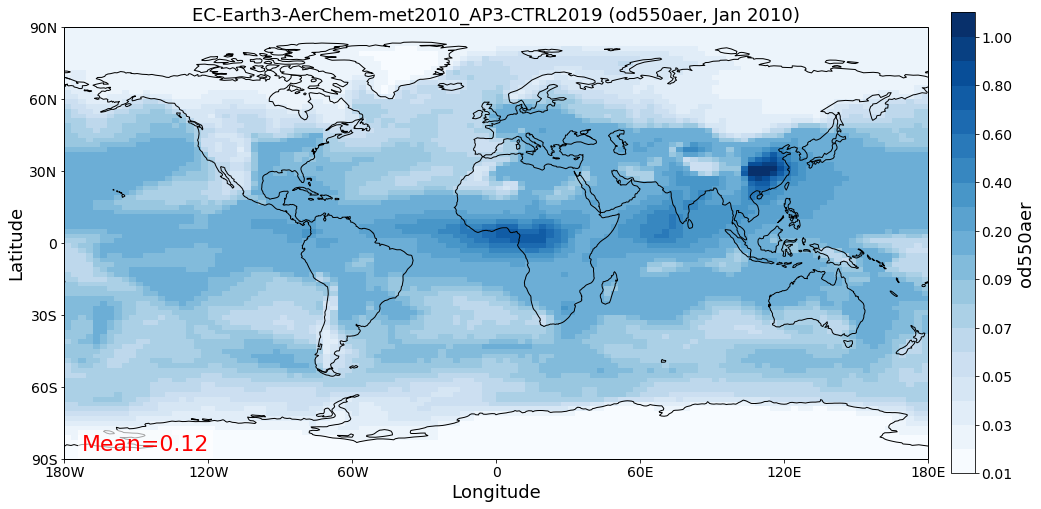

In [29]:
model.quickplot_map();

In [30]:
# fix the load 

In [31]:
data_coloc = pya.colocation.colocate_gridded_gridded(model, sat, ts_type='monthly', filter_name='WORLD-noMOUNTAINS-OCN') 
# Filter_name='WORLD-noMOUNTAINS')

Applying regional cropping in GriddedData using Filter class. Note that this does not yet include potential cropping in the vertical dimension. Coming soon...


Masks are available in MyPyaerocom


Applying regional cropping in GriddedData using Filter class. Note that this does not yet include potential cropping in the vertical dimension. Coming soon...
/home/hannas/anaconda3/envs/TEST/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
Setting od550aer outlier lower lim: -1.00
Setting od550aer outlier upper lim: 10.00
/home/hannas/Desktop/pyaerocom/pyaerocom/griddeddata.py:1265: RuntimeWarning: invalid value encountered in less
  mask = np.logical_or(self.grid.data < low,
/home/hannas/Desktop/pyaerocom/pyaerocom/griddeddata.py:1266: RuntimeWarning: invalid value encountered in greater
  self.grid.data > high)


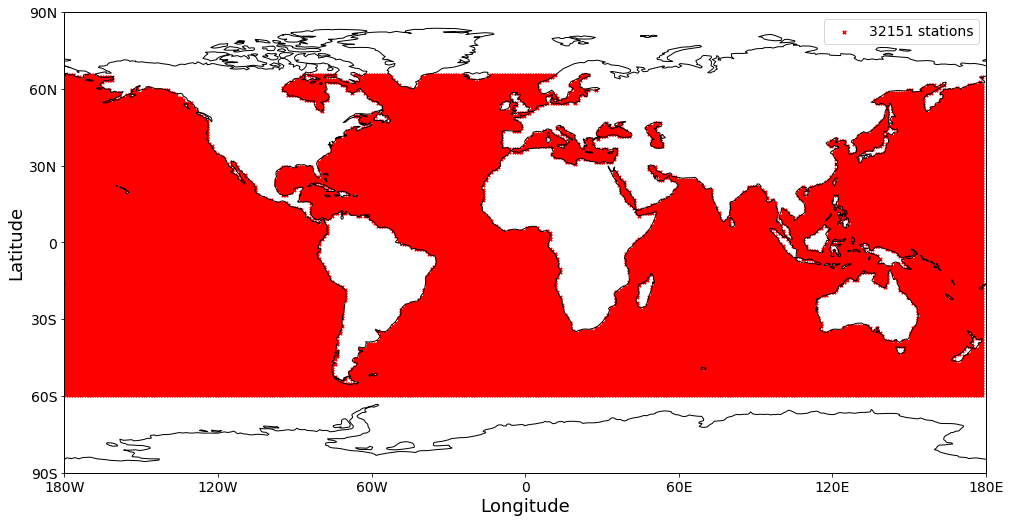

In [32]:
data_coloc.plot_coordinates()

# CTRL run? Compare to AERONETSUN --> Ungriddeddata object.
## Duplicate od550aer -

Deactivating file search by vertical code for ECMWF_CAMS_REAN, since filenames do not include information about vertical code (probably AeroCom 2 convention)


Masks are available in MyPyaerocom
Masks are available in MyPyaerocom


Applying regional cropping in GriddedData using Filter class. Note that this does not yet include potential cropping in the vertical dimension. Coming soon...
Setting od550aer outlier lower lim: -1.00
Setting od550aer outlier upper lim: 10.00
Interpolating data of shape (365, 29, 44). This may take a while.
/home/hannas/anaconda3/envs/TEST/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/hannas/anaconda3/envs/TEST/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)

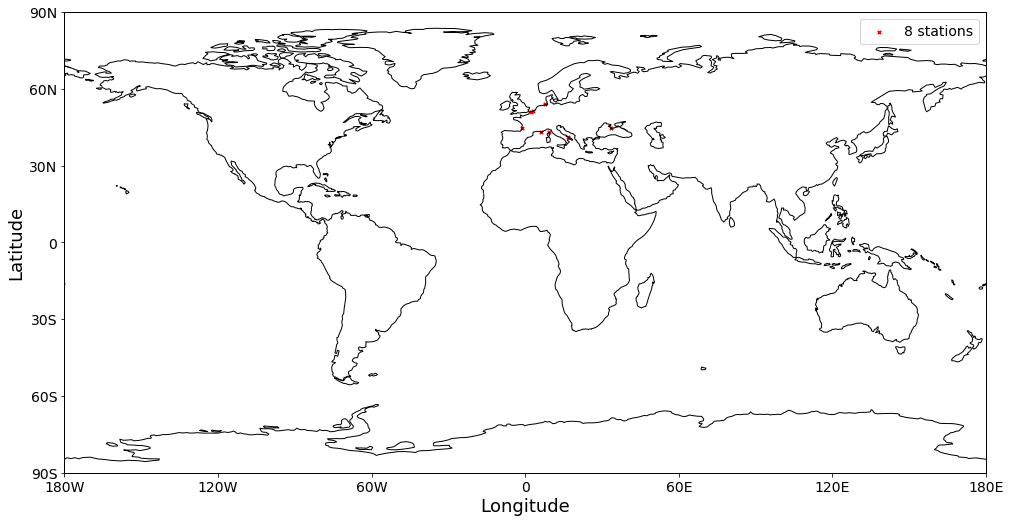

In [33]:

YEAR = 2010
VAR = "od550aer"
TS_TYPE = "daily"
MODEL_ID = "ECMWF_CAMS_REAN"
OBS_ID = 'AeronetSunV3Lev2.daily'

model_reader = pya.io.ReadGridded(MODEL_ID)
model_data = model_reader.read_var(VAR, start=YEAR)

obs_reader = pya.io.ReadUngridded(OBS_ID, [VAR])
obs_data = obs_reader.read()#.filter_by_meta(altitude=[0, 1000])

f = Filter(name = 'EUROPE-noMOUNTAINS-OCN')
#model_data = f.apply(model_data)
#obs_data = f.apply(obs_data)
data_coloc_alt = pya.colocation.colocate_gridded_ungridded(model_data, obs_data, ts_type='monthly',
                                                           filter_name='EUROPE-noMOUNTAINS-OCN',
                                                           colocate_time=True)

data_coloc_alt.plot_coordinates()#scatter(marker='o', mec='none', color='b', alpha=0.05);


Masks are available in MyPyaerocom


Applying regional cropping in GriddedData using Filter class. Note that this does not yet include potential cropping in the vertical dimension. Coming soon...
Setting od550aer outlier lower lim: -1.00
Setting od550aer outlier upper lim: 10.00
Interpolating data of shape (365, 29, 44). This may take a while.
/home/hannas/anaconda3/envs/TEST/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/hannas/anaconda3/envs/TEST/lib/python3.7/site-packages/iris/analysis/_scipy_interpolate.py:290: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)

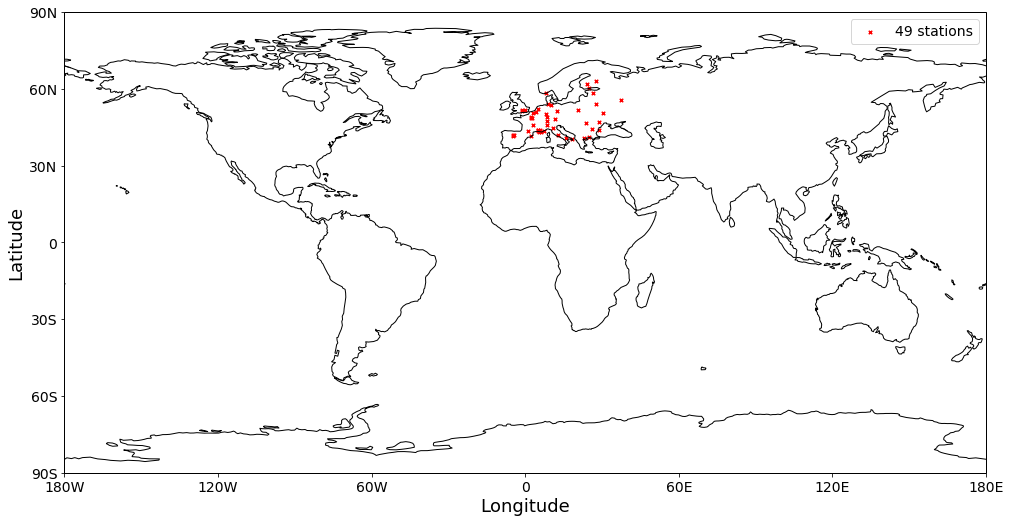

In [34]:
data_coloc_alt = pya.colocation.colocate_gridded_ungridded(model_data, obs_data, ts_type='monthly',
                                                           filter_name='EUROPE-noMOUNTAINS-LAND',
                                                           colocate_time=True)

data_coloc_alt.plot_coordinates()#scatter(marker='o', mec='none', color='b', alpha=0.05);


In [35]:
pya.browse_database('*aeronet*')

FileNotFoundError('None of the available files in /lustre/storeA/project/aerocom/aerocom1/AERONET_TESTBED-SK matches a registered pyaerocom file convention')
FileNotFoundError('None of the available files in /lustre/storeA/project/aerocom/aerocom1/AERONET_TESTBED-SK matches a registered pyaerocom file convention')


Reading failed for AeronetSunV2Lev1.5.daily. Error: NetworkNotImplemented('No reading class available yet for dataset AeronetSunV2Lev1.5.daily')
Reading failed for AeronetSun_2.0_NRT. Error: NetworkNotImplemented('No reading class available yet for dataset AeronetSun_2.0_NRT')

Dataset name: AeronetSunV2Lev2.daily
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetRaw2.0/renamed
Supported variables: ['od1640aer', 'od1020aer', 'od870aer', 'od675aer', 'od667aer', 'od555aer', 'od551aer', 'od532aer', 'od531aer', 'od500aer', 'od440aer', 'od380aer', 'od340aer', 'ang4487aer', 'od550aer', 'ang4487aer_calc']
Last revision: 20180519

Dataset name: AeronetSunV2Lev2.AP
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetSun2.0AllPoints/renamed
Supported variables: ['od1640aer', 'od1020aer', 'od870aer', 'od675aer', 'od667aer', 'od555aer', 'od551aer', 'od532aer', 'od531aer', 'od500aer', 'od440aer', 'od380aer', 'od340aer', 'ang4487aer', 'od550aer

In [36]:
#data_coloc = pya.colocation.colocate_gridded_ungridded(model, sat, ts_type='monthly') # Filter_name='WORLD-noMOUNTAINS')

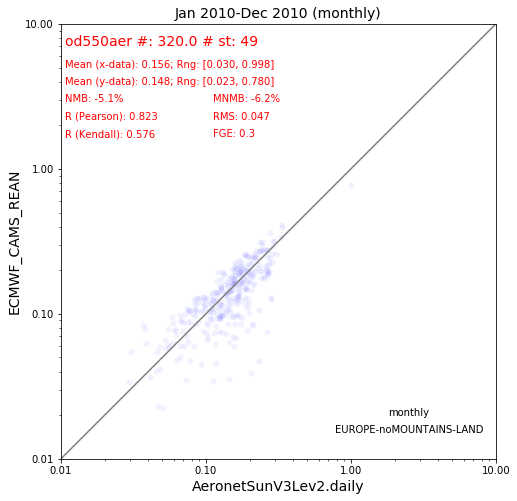

In [37]:
# four of these plots.
ax = data_coloc_alt.plot_scatter(marker='o', mec='none', color='b', alpha=0.05);

In [38]:
sat = pya.io.ReadGridded('MODIS6.aqua').read_var('od550aer', start=2010)

Deactivating file search by vertical code for MODIS6.aqua, since filenames do not include information about vertical code (probably AeroCom 2 convention)
/home/hannas/anaconda3/envs/TEST/lib/python3.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1932: UserWarning: Ignoring netCDF variable 'od550aer' invalid units 'none'
  warnings.warn(msg)
Overwriting unit unknown in cube od550aer with value "1"


In [39]:
coldata = pya.colocation.colocate_gridded_ungridded(sat, obs_data, ts_type='monthly',
                                                    filter_name='OCN')

Masks are available in MyPyaerocom


Setting od550aer outlier lower lim: -1.00
Setting od550aer outlier upper lim: 10.00
Interpolating data of shape (365, 180, 360). This may take a while.
/home/hannas/anaconda3/envs/TEST/lib/python3.7/site-packages/numpy/ma/core.py:3172: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/home/hannas/anaconda3/envs/TEST/lib/python3.7/site-packages/numpy/ma/core.py:3204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]
/home/hannas/anaconda3/envs/TEST/lib/python3.7/site-packages/iris/analysis/_scipy_interpol

In [40]:
coldata

<xarray.DataArray 'od550aer' (data_source: 2, time: 12, station_name: 39)>
array([[[       nan, 0.03649583, 0.04834874,        nan, 0.09802502,
         0.13859757,        nan,        nan,        nan,        nan,
                nan,        nan, 0.05173295, 0.30861512,        nan,
         0.25005923,        nan,        nan, 0.07223784, 0.11905633,
                nan,        nan,        nan,        nan,        nan,
                nan, 0.04695765, 0.19958883,        nan,        nan,
                nan, 0.07920338, 0.09018515,        nan,        nan,
                nan,        nan, 0.0636836 ,        nan],
        [       nan, 0.05131321,        nan,        nan, 0.11521505,
                nan,        nan,        nan,        nan,        nan,
                nan,        nan,        nan, 0.29537602,        nan,
         0.27391585,        nan,        nan, 0.08800189, 0.0901993 ,
         0.33724074,        nan,        nan,        nan,        nan,
                nan,        nan, 0.2979

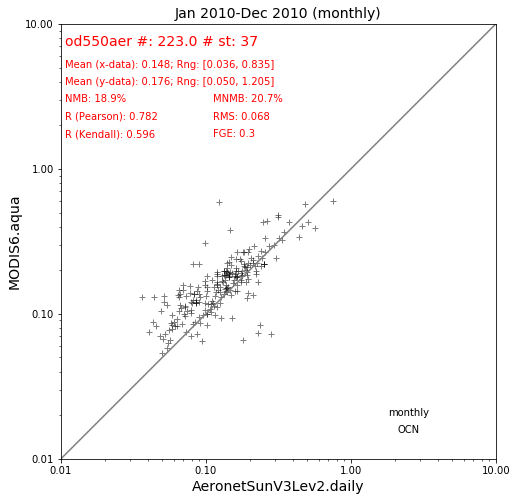

In [41]:
coldata.plot_scatter()

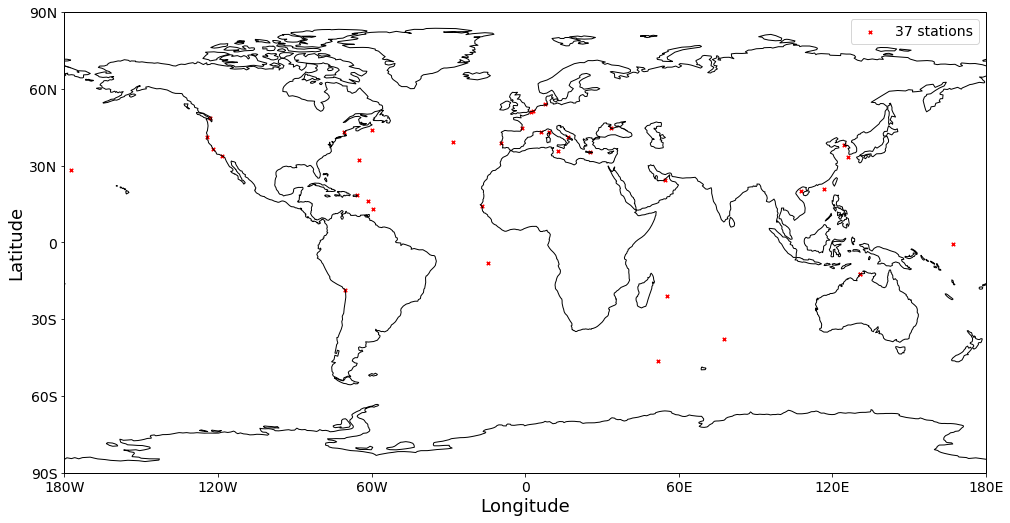

In [42]:
coldata.plot_coordinates()